### Náhodný výběr z rovnoměrného rozdělení na intervalu [0, 60]

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [155]:
#np.random.seed(1)  # pro reprodukovatelnost; pokud chcete skutečně náhodný, změňte nebo odstraňte
n = 100 # velikost výběru
low, high = 0.0, 60.0
sample = np.random.uniform(low, high, size=n)
sample

array([18.01490037,  8.5803497 , 54.07850618, 32.49356273, 58.48442225,
       38.196264  , 59.63478148, 32.76424825, 31.58555603,  8.12567418,
       21.34231026,  1.57311404,  9.62371077, 44.73823156,  1.8239814 ,
       21.99258583, 51.74077517, 41.56066305, 41.45652852, 11.31820806,
       26.51425684, 34.89464444, 59.38510246, 12.23437351, 14.86397411,
       15.73038503, 45.0103448 , 27.41851965,  3.4157663 , 30.51097444,
       12.71760988, 47.91625469, 17.83988289,  1.65636072, 35.60594697,
       50.63042574, 22.86096744, 44.99149864, 30.6684887 , 32.4571083 ,
       57.56605926, 48.23765349,  1.939384  , 42.56323507, 27.90008889,
       56.85293648, 13.28596406, 16.02432118,  4.88843789, 25.71712972,
        6.54112584, 38.02720564, 48.17779424, 41.80802977, 45.97268286,
       20.54724719, 50.75108898, 25.7261265 , 49.44059222, 37.58976952,
        8.60538292,  4.70321399,  1.09995857,  4.00349986, 27.51502882,
        6.80051537,  1.66700093, 45.29168888, 23.69102883, 44.81

### Standardizace vzorku (odečtení průměru a dělení směrodatnou odchylkou)

In [156]:
mean_sample = sample.mean()
sd_sample = sample.std(ddof=1)


In [157]:
mean_sample

np.float64(29.33719649473601)

In [158]:
sd_sample

np.float64(18.34715427022184)

In [159]:
z_sample = (sample - mean_sample) / sd_sample
z_sample

array([-0.61711456, -1.13133876,  1.34850938,  0.17203574,  1.58865104,
        0.48285785,  1.65135064,  0.18678928,  0.12254541, -1.15612056,
       -0.4357562 , -1.51326369, -1.07447103,  0.83942364, -1.49959033,
       -0.40031334,  1.22109284,  0.66623229,  0.6605565 , -0.98211353,
       -0.15386253,  0.30290517,  1.63774205, -0.93217851, -0.7888538 ,
       -0.74163062,  0.854255  , -0.10457626, -1.4128311 ,  0.06397602,
       -0.90584002,  1.01263978, -0.62665378, -1.50872639,  0.34167427,
        1.16057395, -0.35298275,  0.8532278 ,  0.07256124,  0.17004881,
        1.53859625,  1.03015741, -1.49330038,  0.72087684, -0.07832864,
        1.49972795, -0.87486224, -0.72560982, -1.33256407, -0.19730944,
       -1.24248536,  0.47364343,  1.02689482,  0.67971485,  0.90670663,
       -0.47909061,  1.16715062, -0.19681908,  1.09572283,  0.44980126,
       -1.12997434, -1.34265958, -1.53905273, -1.38079706, -0.09931609,
       -1.2283475 , -1.50814645,  0.86958948, -0.30774079,  0.84

### Teoretické kvantily standardního a normálního rozdělení pro p = (i-0.5)/n

In [ ]:
prob = (np.arange(1, n + 1) - 0.5) / n # percentily, posun o 0,5 kvuli vypoctu

# ppf = percent point function — tedy inverzní distribuční funkce (kvantilová funkce).
# Ta nám řekne: "K jaké hodnotě normálního rozdělení odpovídá tato pravděpodobnost?"
theoretical_q = stats.norm.ppf(prob) # normalni

empirical_q = np.sort(z_sample) # standardni

### QQ-plot (teoretické na x, empirické na y)

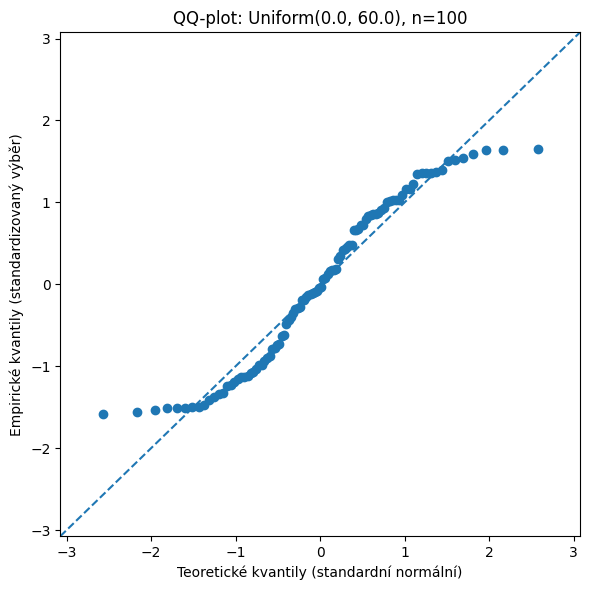

In [161]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(theoretical_q, empirical_q)

# reference line y = x
lims = [
    min(theoretical_q.min(), empirical_q.min()) - 0.5,
    max(theoretical_q.max(), empirical_q.max()) + 0.5,
]

ax.plot(lims, lims, linestyle="--")
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("Teoretické kvantily (standardní normální)")
ax.set_ylabel("Empirické kvantily (standardizovaný výběr)")
ax.set_title(f"QQ-plot: Uniform({low}, {high}), n={n}")
plt.tight_layout()

In [162]:
# připravíme tabulku s některými hodnotami (vzor, standardizovaná hodnota, pořadí a kvantil)
df = pd.DataFrame(
    {
        "pořadí": np.arange(1, n + 1),
        "hodnota": np.sort(sample),
        "standardizováno (z)": empirical_q,
        "teoretický_q": theoretical_q,
    }
)
df.head()


,pořadí,hodnota,standardizováno (z),teoretický_q
0,1,0.181077,-1.589136,-2.575829
1,2,0.621856,-1.565111,-2.170090
2,3,1.099959,-1.539053,-1.959964
3,4,1.573114,-1.513264,-1.811911
4,5,1.656361,-1.508726,-1.695398


### Posuďte, jak se výběrové empirické rozdělenı liší od normálního

QQ-graf porovnává dvě rozdělení – zde:
- teoretické kvantily normálního rozdělení (na ose X),
- empirické kvantily tvého výběru (na ose Y).

Každý bod představuje „odpovídající pozici“ ve dvou rozděleních – např. 10. percentil, 50. percentil, 90. percentil atd.

Pokud by výběr byl opravdu normálně rozdělený, body by ležely přibližně na přímce y = x.

Při porovnání QQ-plotu je vidět:

- střed (kolem mediánu) se může zdát podobný — hodnoty nejsou moc odlišné
- okraje (taily) se ale silně liší:
    Rovnoměrné rozdělení má konečné meze (např. od 0 do 60).
    Normální rozdělení se teoreticky rozprostírá do nekonečna.

Proto v levé části (malé kvantily) jsou body nad přímkou a v pravé části (velké kvantily) jsou body pod přímkou => „esovitý“ (S) tvar grafu — typický znak, že rozdělení má kratší ocasy než normální.